Integrantes:    Breno Montanha Costa
                Lucas Henrique Nogueira

Sacarose -> Glicose + Frutose -> Acidos e Furfurais
dC1/dt = −γ1C1
dC2/dt = γ1C1 − γ2C2
dC3/dt = γ2C2

Com 
    C1 = 10 mol 
    C2 = 0  mol
    C3 = 0  mol

    y1 = 0.1/min
    y2 = 0.01/min

    HCl(pH=1)
    Temperatura de 90°

In [1]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

In [2]:
C1_initial = 10
C2_initial = 0
C3_initial = 0

y1 = 0.1
y2 = 0.01

def C1_f(C1_ant, C2_ant, C3_ant, t):
    return -y1 * C1_ant

def C2_f(C1_ant, C2_ant, C3_ant, t):
    return y1 * C1_ant -y2 * C2_ant

def C3_f(C1_ant, C2_ant, C3_ant, t):
    return y2 * C2_ant

In [ ]:
def Euler_explicit(C1_0, C2_0, C3_0, t, h):
    C1 = np.zeros(len(t))
    C2 = np.zeros(len(t))
    C3 = np.zeros(len(t))
    C1[0] = C1_0
    C2[0] = C2_0
    C3[0] = C3_0
    for i in range(len(t)-1):
        C1[i+1] = C1[i] + h*C1_f(C1[i], C2[i], C3[i], t)
        C2[i+1] = C2[i] + h*C2_f(C1[i], C2[i], C3[i], t)
        C3[i+1] = C3[i] + h*C3_f(C1[i], C2[i], C3[i], t)
    return C1, C2, C3

In [ ]:
def RK4(C1_0, C2_0, C3_0, t, h):
    C1 = np.zeros(len(t))
    C2 = np.zeros(len(t))
    C3 = np.zeros(len(t))
    C1[0] = C1_0
    C2[0] = C2_0
    C3[0] = C3_0
    for i in range(len(t)-1):
        k1_C1 = C1[i]
        k1_C2 = C2[i]
        k1_C3 = C3[i]
        k2_C1 = C1[i] + (h/2) * C1_f(k1_C1, k1_C2, k1_C3, t[i])
        k2_C2 = C2[i] + (h/2) * C2_f(k1_C1, k1_C2, k1_C3, t[i])
        k2_C3 = C3[i] + (h/2) * C3_f(k1_C1, k1_C2, k1_C3, t[i])
        k3_C1 = C1[i] + (h/2) * C1_f(k2_C1, k2_C2, k2_C3, t[i] + h/2)
        k3_C2 = C2[i] + (h/2) * C2_f(k2_C1, k2_C2, k2_C3, t[i] + h/2)
        k3_C3 = C3[i] + (h/2) * C3_f(k2_C1, k2_C2, k2_C3, t[i] + h/2)
        k4_C1 = C1[i] + h * C1_f(k3_C1, k3_C2, k3_C3, t[i] + h/2)
        k4_C2 = C2[i] + h * C2_f(k3_C1, k3_C2, k3_C3, t[i] + h/2)
        k4_C3 = C3[i] + h * C3_f(k3_C1, k3_C2, k3_C3, t[i] + h/2)
        C1[i+1] = C1[i] + (h/6) * (C1_f(k1_C1, k1_C2, k1_C3, t[i]) + 2*C1_f(k2_C1, k2_C2, k2_C3, t[i]) + 2*C1_f(k3_C1, k3_C2, k3_C3, t[i]) + C1_f(k4_C1, k4_C2, k4_C3, t[i]))
        C2[i+1] = C2[i] + (h/6) * (C2_f(k1_C1, k1_C2, k1_C3, t[i]) + 2*C2_f(k2_C1, k2_C2, k2_C3, t[i]) + 2*C2_f(k3_C1, k3_C2, k3_C3, t[i]) + C2_f(k4_C1, k4_C2, k4_C3, t[i]))
        C3[i+1] = C3[i] + (h/6) * (C3_f(k1_C1, k1_C2, k1_C3, t[i]) + 2*C3_f(k2_C1, k2_C2, k2_C3, t[i]) + 2*C3_f(k3_C1, k3_C2, k3_C3, t[i]) + C3_f(k4_C1, k4_C2, k4_C3, t[i]))
    return C1, C2, C3

In [19]:
def Adams_bashforth(C1_0, C2_0, C3_0, t, h):
    C1 = np.zeros(len(t))
    C2 = np.zeros(len(t))
    C3 = np.zeros(len(t))
    C1[0] = C1_0
    C2[0] = C2_0
    C3[0] = C3_0
    C1[:5], C2[:5], C3[:5] = RK4(C1_0, C2_0, C3_0, t[:5], h)
    for i in range(4, len(t)-1):
        C1[i+1] = C1[i] + (h/24) * (55*C1_f(C1[i], C2[i], C3[i], t[i]) - 59*C1_f(C1[i-1], C2[i-1], C3[i-1], t[i-1]) + 37*C1_f(C1[i-2], C2[i-2], C3[i-2], t[i-2]) - 9*C1_f(C1[i-3], C2[i-3], C3[i-3], t[i-3]))
        C2[i+1] = C2[i] + (h/24) * (55*C2_f(C1[i], C2[i], C3[i], t[i]) - 59*C2_f(C1[i-1], C2[i-1], C3[i-1], t[i-1]) + 37*C2_f(C1[i-2], C2[i-2], C3[i-2], t[i-2]) - 9*C2_f(C1[i-3], C2[i-3], C3[i-3], t[i-3]))
        C3[i+1] = C3[i] + (h/24) * (55*C3_f(C1[i], C2[i], C3[i], t[i]) - 59*C3_f(C1[i-1], C2[i-1], C3[i-1], t[i-1]) + 37*C3_f(C1[i-2], C2[i-2], C3[i-2], t[i-2]) - 9*C3_f(C1[i-3], C2[i-3], C3[i-3], t[i-3]))
    return C1, C2, C3

In [23]:
def residual(X, C1i, C2i, C3i, C1im1, C2im1, C3im1, C1im2, C2im2, C3im2, t_ip1, t_i, t_im1, t_im2, h):
    C1_ip1, C2_ip1, C3_ip1 = X
    r1 = C1_ip1 - C1i - (h/24) * (
        9*C1_f(C1_ip1, C2_ip1, C3_ip1, t_ip1) +
        19*C1_f(C1i, C2i, C3i, t_i) -
        5*C1_f(C1im1, C2im1, C3im1, t_im1) +
        C1_f(C1im2, C2im2, C3im2, t_im2)
    )
    r2 = C2_ip1 - C2i - (h/24) * (
        9*C2_f(C1_ip1, C2_ip1, C3_ip1, t_ip1) +
        19*C2_f(C1i, C2i, C3i, t_i) -
        5*C2_f(C1im1, C2im1, C3im1, t_im1) +
        C2_f(C1im2, C2im2, C3im2, t_im2)
    )
    r3 = C3_ip1 - C3i - (h/24) * (
        9*C3_f(C1_ip1, C2_ip1, C3_ip1, t_ip1) +
        19*C3_f(C1i, C2i, C3i, t_i) -
        5*C3_f(C1im1, C2im1, C3im1, t_im1) +
        C3_f(C1im2, C2im2, C3im2, t_im2)
    )
    return [r1, r2, r3]

def Adams_moulton(C1_0, C2_0, C3_0, t, h):
    C1 = np.zeros(len(t))
    C2 = np.zeros(len(t))
    C3 = np.zeros(len(t))
    C1[0] = C1_0
    C2[0] = C2_0
    C3[0] = C3_0
    C1[:5], C2[:5], C3[:5] = RK4(C1_0, C2_0, C3_0, t[:5], h)
    for i in range(4, len(t)-1):
        gess = np.array([C1[i], C2[i], C3[i]])
        sol = fsolve(residual, gess, args=(C1[i], C2[i], C3[i], C1[i-1], C2[i-1], C3[i-1], C1[i-2], C2[i-2], C3[i-2], t[i+1], t[i], t[i-1], t[i-2], h))
        C1[i+1], C2[i+1], C3[i+1] = sol
    return C1, C2, C3

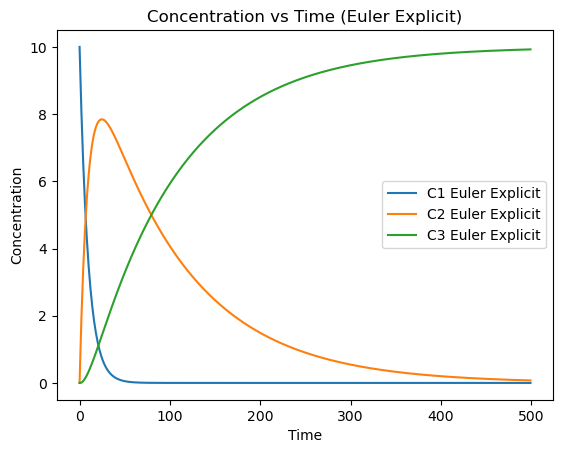

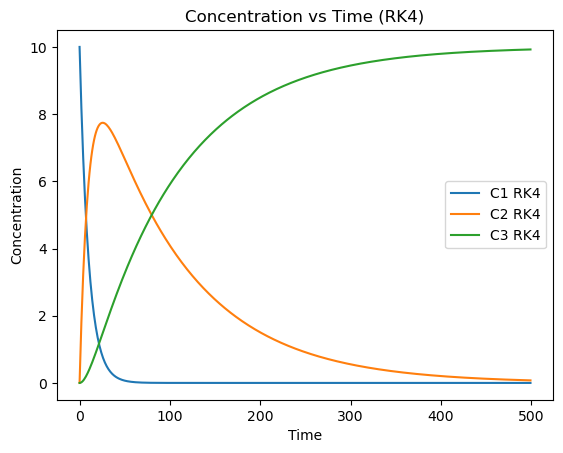

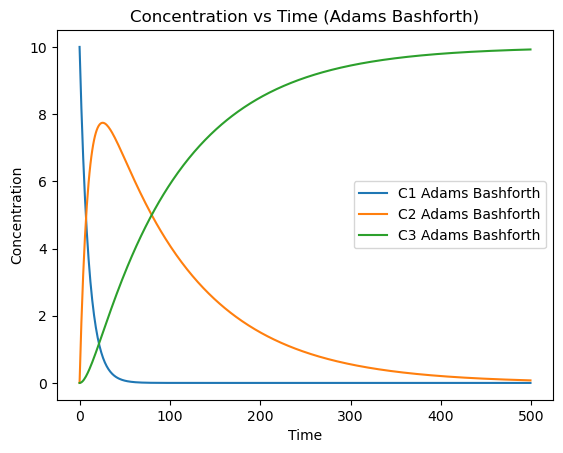

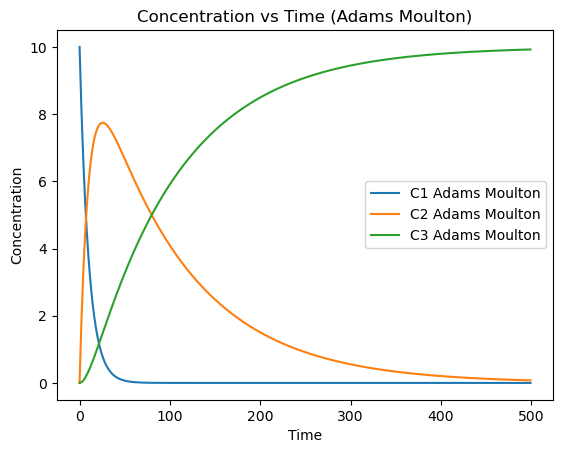

In [25]:
h = 1
t = np.arange(0, 500, h)

C1_euler, C2_euler, C3_euler = Euler_explicit(C1_initial, C2_initial, C3_initial, t, h)
C1_RK4, C2_RK4, C3_RK4 = RK4(C1_initial, C2_initial, C3_initial, t, h)
C1_AdamsB, C2_AdamsB, C3_AdamsB = Adams_bashforth(C1_initial, C2_initial, C3_initial, t, h)
C1_AdamsM, C2_AdamsM, C3_AdamsM = Adams_moulton(C1_initial, C2_initial, C3_initial, t, h)

plt.plot(t, C1_euler, label='C1 Euler Explicit')
plt.plot(t, C2_euler, label='C2 Euler Explicit')
plt.plot(t, C3_euler, label='C3 Euler Explicit')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration vs Time (Euler Explicit)')
plt.legend()
plt.show()

plt.plot(t, C1_RK4, label='C1 RK4')
plt.plot(t, C2_RK4, label='C2 RK4')
plt.plot(t, C3_RK4, label='C3 RK4')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration vs Time (RK4)')
plt.legend()
plt.show()

plt.plot(t, C1_AdamsB, label='C1 Adams Bashforth')
plt.plot(t, C2_AdamsB, label='C2 Adams Bashforth')
plt.plot(t, C3_AdamsB, label='C3 Adams Bashforth')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration vs Time (Adams Bashforth)')
plt.legend()
plt.show()

plt.plot(t, C1_AdamsM, label='C1 Adams Moulton')
plt.plot(t, C2_AdamsM, label='C2 Adams Moulton')
plt.plot(t, C3_AdamsM, label='C3 Adams Moulton')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentration vs Time (Adams Moulton)')
plt.legend()
plt.show()